# Instruction
The code is modified based on the starter code. Q1, Q2, Q3, and Q4 are functions that are used to check.
### For example, to check Q3:
1. Change the initial input in Q3() if needed. [step = 10000, trial = 10, policy = random_policy]
2. Run the first coding cell to get the Callable Q1~Q4 functions.
3. To check Q3, simply type "Q3()" in a new coding cell and run it. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Callable
from enum import IntEnum


class Action(IntEnum):
    """Action"""

    LEFT = 0
    DOWN = 1
    RIGHT = 2
    UP = 3


def actions_to_dxdy(action: Action):
    """
    Helper function to map action to changes in x and y coordinates

    Args:
        action (Action): taken action

    Returns:
        dxdy (Tuple[int, int]): Change in x and y coordinates
    """
    mapping = {
        Action.LEFT: (-1, 0),
        Action.DOWN: (0, -1),
        Action.RIGHT: (1, 0),
        Action.UP: (0, 1),
    }
    return mapping[action]


def reset():
    """Return agent to start state"""
    return (0, 0)


# Q1
def simulate(state: Tuple[int, int], action: Action):
    """Simulate function for Four Rooms environment

    Implements the transition function p(next_state, reward | state, action).
    The general structure of this function is:
        1. If goal was reached, reset agent to start state
        2. Calculate the action taken from selected action (stochastic transition)
        3. Calculate the next state from the action taken (accounting for boundaries/walls)
        4. Calculate the reward

    Args:
        state (Tuple[int, int]): current agent position (e.g. (1, 3))
        action (Action): selected action from current agent position (must be of type Action defined above)

    Returns:
        next_state (Tuple[int, int]): next agent position
        reward (float): reward for taking action in state
    """
    # Walls are listed for you
    # Coordinate system is (x, y) where x is the horizontal and y is the vertical direction
    walls = [
        (0, 5),
        (2, 5),
        (3, 5),
        (4, 5),
        (5, 0),
        (5, 2),
        (5, 3),
        (5, 4),
        (5, 5),
        (5, 6),
        (5, 7),
        (5, 9),
        (5, 10),
        (6, 4),
        (7, 4),
        (9, 4),
        (10, 4),
    ]

    # check if goal was reached
    goal_state = (10, 10)
    if state == goal_state:
        next_state = (0,0)
        reward = 0
        return next_state, reward

    # modify action_taken so that 10% of the time, the action_taken is perpendicular to action (there are 2 perpendicular actions for each action)
    action_taken = actions_to_dxdy(action)
    probabilities = [0.9, 0.05, 0.05]   # Noise Setup

    if (action == Action.UP) or (action == Action.DOWN):
        next_state_prob = [tuple(np.add(state, action_taken)), tuple(np.add(state, (1,0))), tuple(np.add(state,(-1,0)))]
    elif (action == Action.RIGHT) or (action == Action.LEFT):
        next_state_prob = [tuple(np.add(state, action_taken)), tuple(np.add(state, (0,1))), tuple(np.add(state,(0,-1)))]

    next_state = next_state_prob[np.random.choice(len(next_state_prob), p=probabilities)]

    # check if collide into a wall, or out out bounds
    bounds = (10,10)
    # hit_wall = False

    # check if at goal
    if next_state==goal_state:
        reward = 1
    else:
        reward = 0
        # if in bounds
        if all(0 <= a <= b for a, b in zip(next_state, bounds)):
            #if hit walls
            for tup in walls:
                if tup == next_state:
                    # hit_wall = True
                    next_state = state
                    break
        else:  #out of bounds
            next_state = state

    return next_state, reward


# Q2
def manual_policy(state: Tuple[int, int]):
    """A manual policy that queries user for action and returns that action

    Args:
        state (Tuple[int, int]): current agent position (e.g. (1, 3))

    Returns:
        action (Action)
    """
    # input action

    actions = {
        'a': 0,
        's': 1,
        'd': 2,
        'w': 3,
    }

    # input action
    act = input('w-up, a-left, s-down, d-right, press ENTER to countinue: ')
    
    while act not in actions:
        act = input('Invalid Input! Please try again, acceptable actions: w-up, a-left, s-down, d-right:\n')
    
    return Action(actions[act])



# Q2
def agent(
    steps: int = 1000,
    trials: int = 1,
    policy=Callable[[Tuple[int, int]], Action],
):
    
    rewards_list_t = []
    
    # you can use the following structure and add to it as needed
    for t in range(trials):
        state = reset()
        rewards = 0
        i = 0
        rewards_list = []
        while i < steps:
            i += 1
            # select action to take
            action = policy(state)
            # take step in environment using simulate()
            state,reward = simulate(state,action)
            # record the reward
            rewards += reward
            rewards_list.append(rewards)
            
            if policy == manual_policy:
                print("Current State:", state, ", Reward:", rewards)
                
        rewards_list_t.append(rewards_list)
    
    plot_func(rewards_list_t)


# Q3
def random_policy(state: Tuple[int, int]):
    """A random policy that returns an action uniformly at random

    Args:
        state (Tuple[int, int]): current agent position (e.g. (1, 3))

    Returns:
        action (Action)
    """

    probabilities = [0.25, 0.25, 0.25, 0.25]   # evenly distributed four directions
    
    act = np.random.choice(Action, p=probabilities)

    return Action(act)


# PLOT FUNCTION
def plot_func(rw_list):
    # set the figure size
    plt.figure(figsize=(8, 6))
    
    # plot each trial
    for p in rw_list:
        plt.plot(list(range(len(rw_list[0]))), p, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_rw = np.array(rw_list).mean(axis=0).tolist()
    plt.plot(list(range(len(rw_list[0]))), mean_rw, linestyle="-", linewidth=2, color="k", label= 'Mean Reward')

    # plot the figure
    plt.ylabel("Cumulative reward")
    plt.xlabel("Time step")
    plt.legend()
    plt.show()


def worse_policy(state: Tuple[int, int]):
    """A policy that is worse than the random_policy

    Args:
        state (Tuple[int, int]): current agent position (e.g. (1, 3))

    Returns:
        action (Action)
    """
    probabilities = [0.3, 0.3, 0.2, 0.2]   # decrease the probabilites of moving upward and to the right
    
    act = np.random.choice(Action, p=probabilities)

    return Action(act)


# Q4
def better_policy(state: Tuple[int, int]):
    """A policy that is better than the random_policy

    Args:
        state (Tuple[int, int]): current agent position (e.g. (1, 3))

    Returns:
        action (Action)
    """

#     ### Wall Check Sensor
#     # sensor_range = 1
#     hit_wall = [1, 1, 1, 1] # assume it is surrounded by walls
#     for d in range(len(Action.__members__)):
#         # Wall Check
#         wall_check = tuple(np.add(state, actions_to_dxdy(Action(d))))
#         if all(0 <= a <= b for a, b in zip(wall_check, bounds)):
#             if wall_check not in walls:
#                 hit_wall[d] = 0
                
#     num_hit = hit_wall.count(0)
#     prob = 1 / num_hit
#     valid_action = [prob if val == 0 else 0 for val in hit_wall]
    
#     act = np.random.choice(Action, p=valid_action)

#     return Action(act)

    probabilities = [0.1, 0.1, 0.4, 0.4]   # increase the probabilites of moving upward and to the right
    
    act = np.random.choice(Action, p=probabilities)

    return Action(act)

def Q1():
    # In this case, the obj is at (10,9) and going to move up.
    print(simulate((10,9),Action.UP))

def Q2():
    # In this case, [step = 1000, trial = 1].
    agent(1000,1,manual_policy)

def Q3():
    # In this case, [step = 10000, trial = 10].
    agent(10000,10, random_policy)
    
def Q4():
    agent(10000,10, better_policy)
    agent(10000,10, worse_policy)

In [2]:
# run this cell for Q1 to check Simulator, change the inputs if required
# In this case, the obj is at (10,9) and going to move up.

Q1()

((10, 10), 1)


In [3]:
Q2()  # Interrupt the kernel mannually, if don't want to run 1000 times.

w-up, a-left, s-down, d-right, press ENTER to countinue: w
Current State: (0, 1) , Reward: 0
w-up, a-left, s-down, d-right, press ENTER to countinue: w
Current State: (0, 2) , Reward: 0
w-up, a-left, s-down, d-right, press ENTER to countinue: w
Current State: (0, 3) , Reward: 0
w-up, a-left, s-down, d-right, press ENTER to countinue: w
Current State: (0, 4) , Reward: 0
w-up, a-left, s-down, d-right, press ENTER to countinue: d
Current State: (1, 4) , Reward: 0
w-up, a-left, s-down, d-right, press ENTER to countinue: w
Current State: (1, 5) , Reward: 0
w-up, a-left, s-down, d-right, press ENTER to countinue: w
Current State: (1, 6) , Reward: 0
w-up, a-left, s-down, d-right, press ENTER to countinue: w
Current State: (1, 7) , Reward: 0
w-up, a-left, s-down, d-right, press ENTER to countinue: w
Current State: (1, 8) , Reward: 0
w-up, a-left, s-down, d-right, press ENTER to countinue: w
Current State: (1, 9) , Reward: 0
w-up, a-left, s-down, d-right, press ENTER to countinue: d
Current Sta

KeyboardInterrupt: Interrupted by user

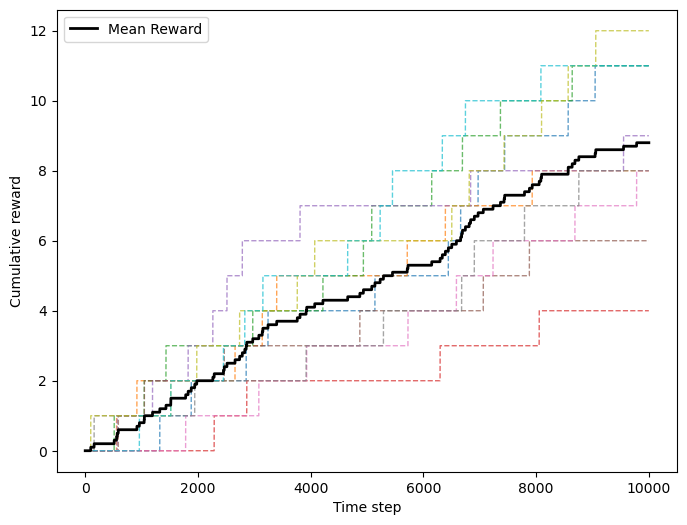

In [18]:
Q3() # Random Policy

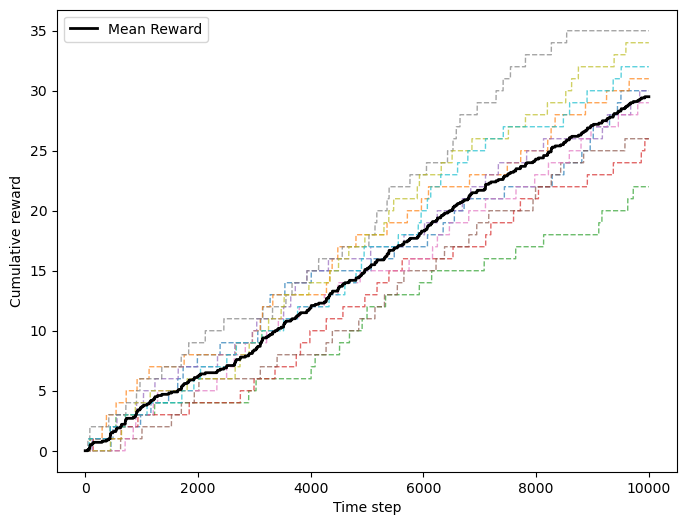

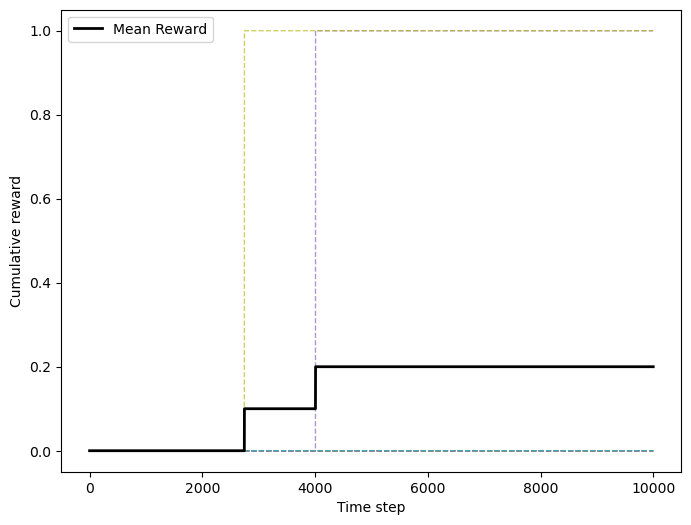

In [4]:
Q4() 
# 1st figure: Better Policy
# 2nd figure: Worse Policy